# Fitting statistical distributions to univariate data

There isn't always a clear or consensus way of fitting a KDE to some data particularly in histogram form for continuous and discrete distribution types.

We attempt to solve this with the combination of `turb.stats.univariate_kde` and `turb.plot.histogram`.

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../../turbopanda/")
import turbopanda as turb

%matplotlib inline

## Parameters of the histogram:

Firstly let's try to plot a basic normal distribution:

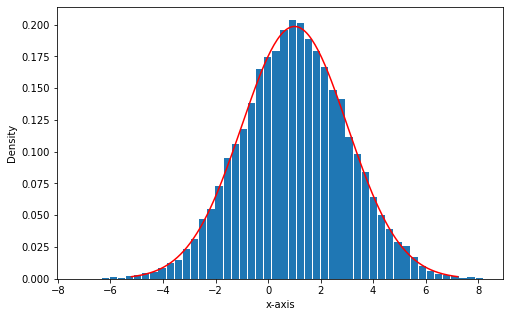

In [83]:
x = stats.norm.rvs(loc=1, scale=2., size=20000)
_=turb.plot.histogram(x)

Within `histogram` we can choose to specify *custom* bins if we want, but the default selections are usually pretty good.

The `kde` parameter determines if we calculate the KDE or not, which is optional.

By default, a normal kde distribution is imputed:

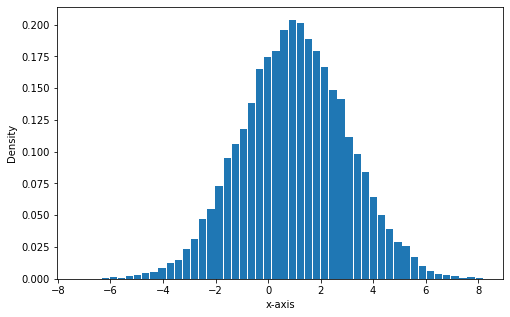

In [84]:
_=turb.plot.histogram(x, kde=None)

Statistical information regarding the histogram can be displayed using the `stat` keyword:

This gives the mean, standard deviation, skew and kurtosis parameters.

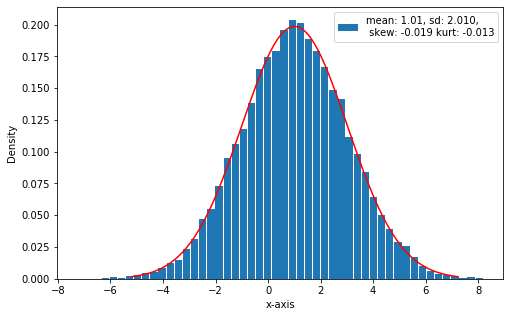

In [85]:
turb.plot.histogram(x, stat=True)

Additionally, if you work with `pandas.Series` and the series has a name, the name is automatically extracted or you can define it yourself:

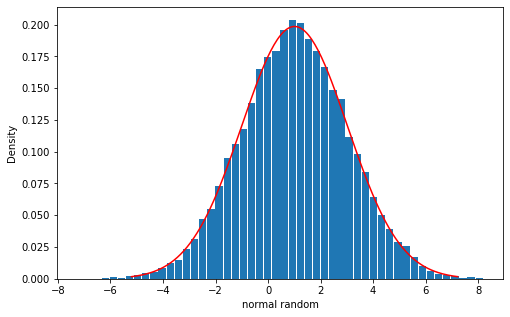

In [86]:
turb.plot.histogram(x, x_label='normal random')

## One step deeper, `univariate_kde`

The actual KDE is calculated from another function which you can access:

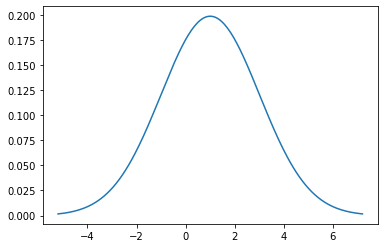

In [87]:
xkd, ykd = turb.stats.univariate_kde(x, kde_name='norm')
_ = plt.plot(xkd, ykd)

## Auto-selecting the distribution

In [88]:
from scipy import stats

In [118]:
dists = turb.stats.scipy_continuous_distributions()
problem_dists = ['argus', 'betaprime', 'erlang', 'cosine', 'exponnorm', 'foldcauchy',
                 'foldnorm', 'genexpon', 'gausshyper', 'invgauss', 'levy_stable',
                 'ksone', 'ncf', 'nct', 'ncx2', 'norminvgauss', 'powerlognorm',
                 'rdist', 'recipinvgauss', 'rv_continuous', 'rv_histogram',
                 'skewnorm','tukeylambda', 'wrapcauchy', 'semicircular','vonmises',
                 'vonmises_line']

In [119]:
dists_ = turb.utils.difference(dists, problem_dists)

In [120]:
import numpy as np
def rmse(x,y):
    return np.sqrt(np.mean(np.square(x - y)))

In [123]:
def score_fits(d):
    z1,z2,m = turb.stats.univariate_kde(x, kde_name=d, return_dist=True)
    v_, agg = stats.probplot(x, sparams=m.args, dist=m.dist)
    return rmse(v_[0], v_[1])

In [124]:
sc = [score_fits(d) for d in dists_]

## Testing different distributions

Here we will test a number of continuous and discrete distributions:

### T-distribution

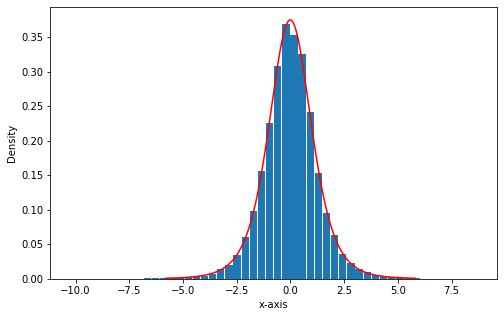

In [12]:
x = stats.t.rvs(df=5, size=20000)
_=turb.plot.histogram(x, kde='t')

### Exponential distribution

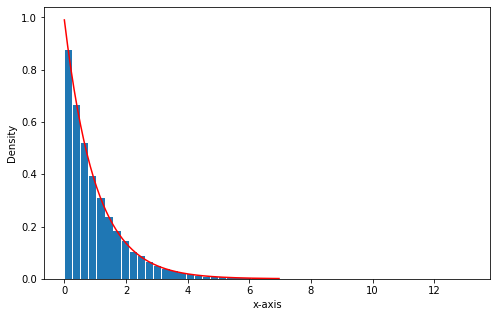

In [13]:
x = stats.expon.rvs(size=20000)
_=turb.plot.histogram(x, kde='expon')

## $\chi^2$-distribution

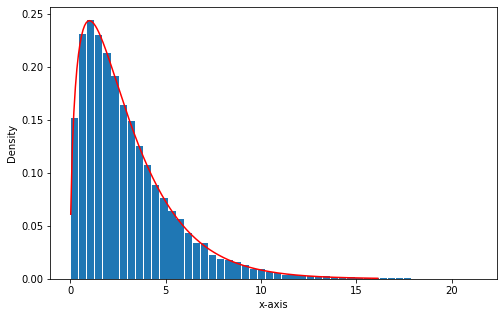

In [14]:
x = stats.chi2.rvs(df=3, size=20000)
_=turb.plot.histogram(x, kde='chi2')

## Discrete distributions

Due to the lack of support from Scipy in fitting the parameters easily for discrete distributions, we have limited support, but we support the most important distributions:

### Bernoulli distribution

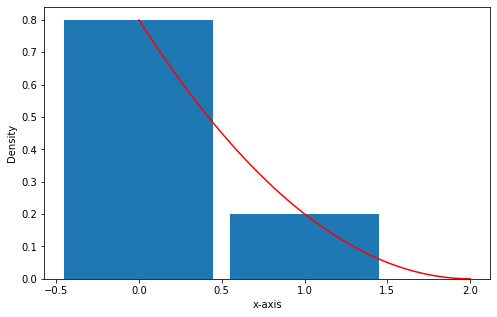

In [15]:
x = stats.bernoulli.rvs(p=.2, size=20000)
_=turb.plot.histogram(x, kde='bernoulli')

### Binomial distribution

estimated: [11.728325, 0.273972602739726, 0], determined: (11.0, 0.31924167481880666, -0.0)


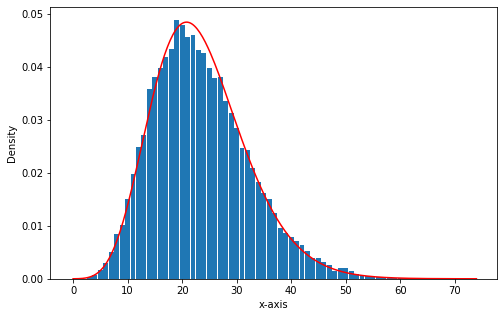

In [25]:
x = stats.nbinom.rvs(n=10, p=.3, size=20000)
_=turb.plot.histogram(x, kde='nbinom', verbose=1)

### Poisson distribution

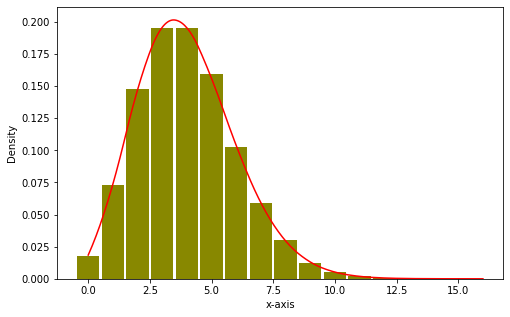

In [21]:
x = stats.poisson.rvs(mu=4, size=20000)
_=turb.plot.histogram(x, kde='poisson', facecolor='#888800')